## Climate Dataset Analysis

The data set you loaded uses a 30-year mean between 1951 and 1980 to calculate a base temperature for that period, and then uses 5-year mean temperatures to calculate the difference between the 5-year mean and the 30-year mean for each year. The scatter plot shows the annual temperature differences.

[1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893.
 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905.
 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917.
 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929.
 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941.
 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953.
 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965.
 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977.
 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989.
 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001.
 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014.] [-0.5  -0.51 -0.56 -0.63 -0.65 -0.57 -0.58 -0.57 -0.52 -0.54 -0.58 -0.53
 -0.47 -0.41 -0.37 -0.34 -0.3  -0.27 -0.3  -0.31 -0.36 -0.4  -0.42 -0.45
 -0.45 -0.42 -0.42 -0.44 -0.4  -0.39 -0.33 

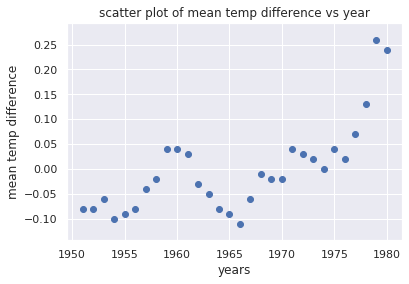

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

yearsBase, meanBase = np.loadtxt('https://explorer.bee.oregonstate.edu/data/5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('https://explorer.bee.oregonstate.edu/data/5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

print( years, mean )


plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

### Generate a linear regression using np.polyfit()

Scatter plots offer a handy means for visualizing data, but suppose you wanted to overlay the scatter plot with a trend line showing how the data is trending over time. One way to compute such trend lines is linear regression. In this exercise, you will use NumPy to perform a linear regression and Matplotlib to draw a trend line from the data.

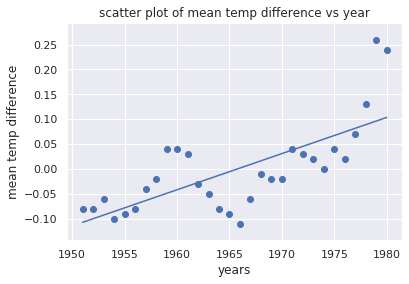

 y = 0.007279199110122221 * x + -14.309265850945222


In [5]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

### Generate linear regression with the scikit-learn LinearRegression() function
Another popular Python library that is widely used in the research community is scikit-learn, which excels at building machine-learning models to help extract information from data. In this exercise, you will use scikit-learn (which was already imported in Unit 2) to compute a trend line for the NASA climate data.

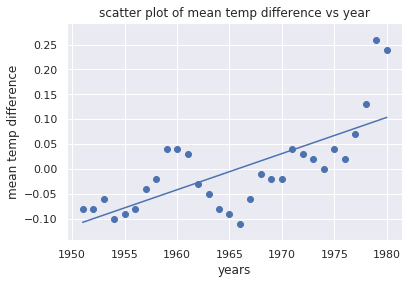

 y = 0.007279199110122355 * x + -14.30926585094549


In [6]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

### Explore the data using Seaborn 

One of the cool things about Jupyter Notebooks — and Python in general — is there are thousands of open-source libraries you can leverage to perform complex tasks without writing a lot of code. In this unit, you'll use Seaborn, a library for statistical visualization, to plot the second of the two data sets you loaded, which covers the years 1882 to 2014. Seaborn can create a regression line accompanied by a projection showing where data points should fall based on the regression with one simple function call.

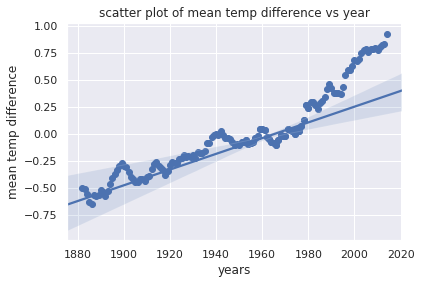

In [7]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

### Improving the prediction - Nonlinear Regression



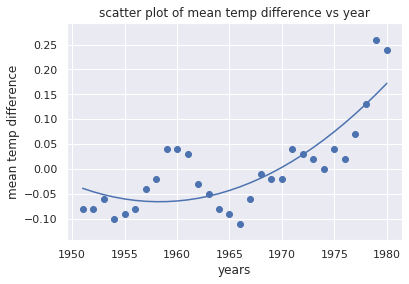

 y = 0.007279199110122355 * x + -14.30926585094549


In [13]:
from scipy.optimize import curve_fit


# define a model function,
def TempModel(t,p1,p2, p3):
    return p1 + p2*t + p3*t*t
     
# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( TempModel, yearsBase, meanBase, p0=(1,1,1) )

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, TempModel(yearsBase, popt[0], popt[1],popt[2]))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

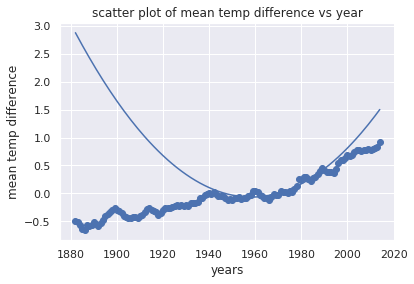

In [14]:
# Generate a plot like the one in the previous exercise
plt.scatter(years, mean)
plt.plot(years, TempModel(years, popt[0], popt[1],popt[2]))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()